# CS 532 Project: Asteroids Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

## 0 Read data

In [2]:
df = pd.read_csv('data/nasa.csv')

In [3]:
df

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False


## 1 Data preprocessing

### 1.1 Correlation matrix

In [4]:
X_ = df.drop(columns=['Hazardous'])
y_ = df['Hazardous']

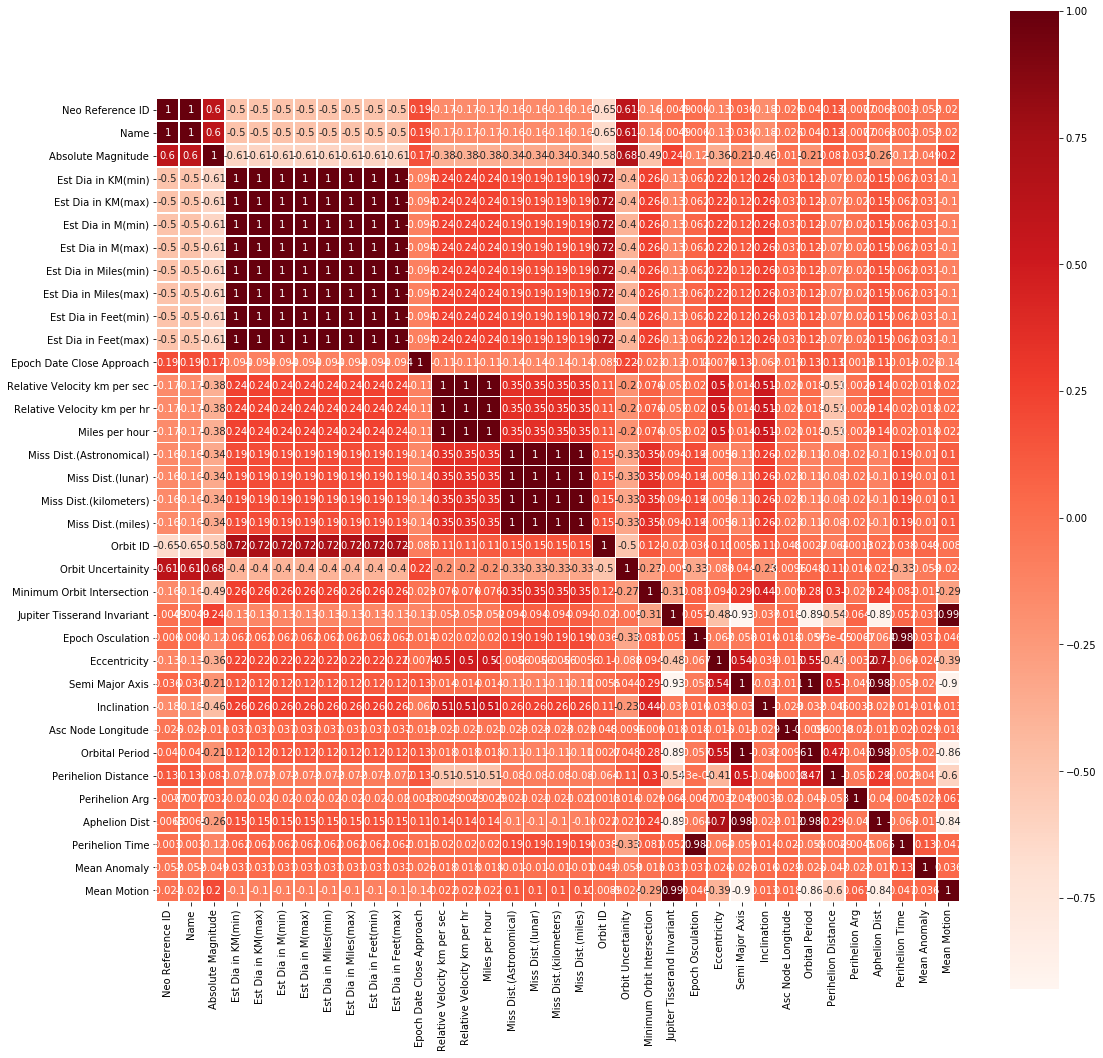

In [5]:
cor = X_.corr()

plt.figure(figsize=(18,18))
heatmap = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, square=True, linewidths=.5)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [6]:
X_.shape

(4687, 39)

In [7]:
X_.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox'],
      dtype='object')

### 1.2 Feature selection

Drop the highly correlated features. Drop the non-numeric features. Drop the features with one single common value.

In [8]:
selected_features = ['Neo Reference ID', 'Est Dia in Feet(max)', 'Epoch Date Close Approach', 
                     'Miles per hour', 'Miss Dist.(Astronomical)', 'Orbit ID', 'Orbit Uncertainity', 
                     'Minimum Orbit Intersection', 
                     'Jupiter Tisserand Invariant', 'Eccentricity', 'Inclination', 
                     'Asc Node Longitude', 'Perihelion Distance', 'Perihelion Arg', 
                     'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly']

In [9]:
X = X_[selected_features]

Convert the Boolean label to (+1)/(-1). 

In [10]:
y = y_
y[y_==True] = 1
y[y_==False] = -1

c:\users\carsonw\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


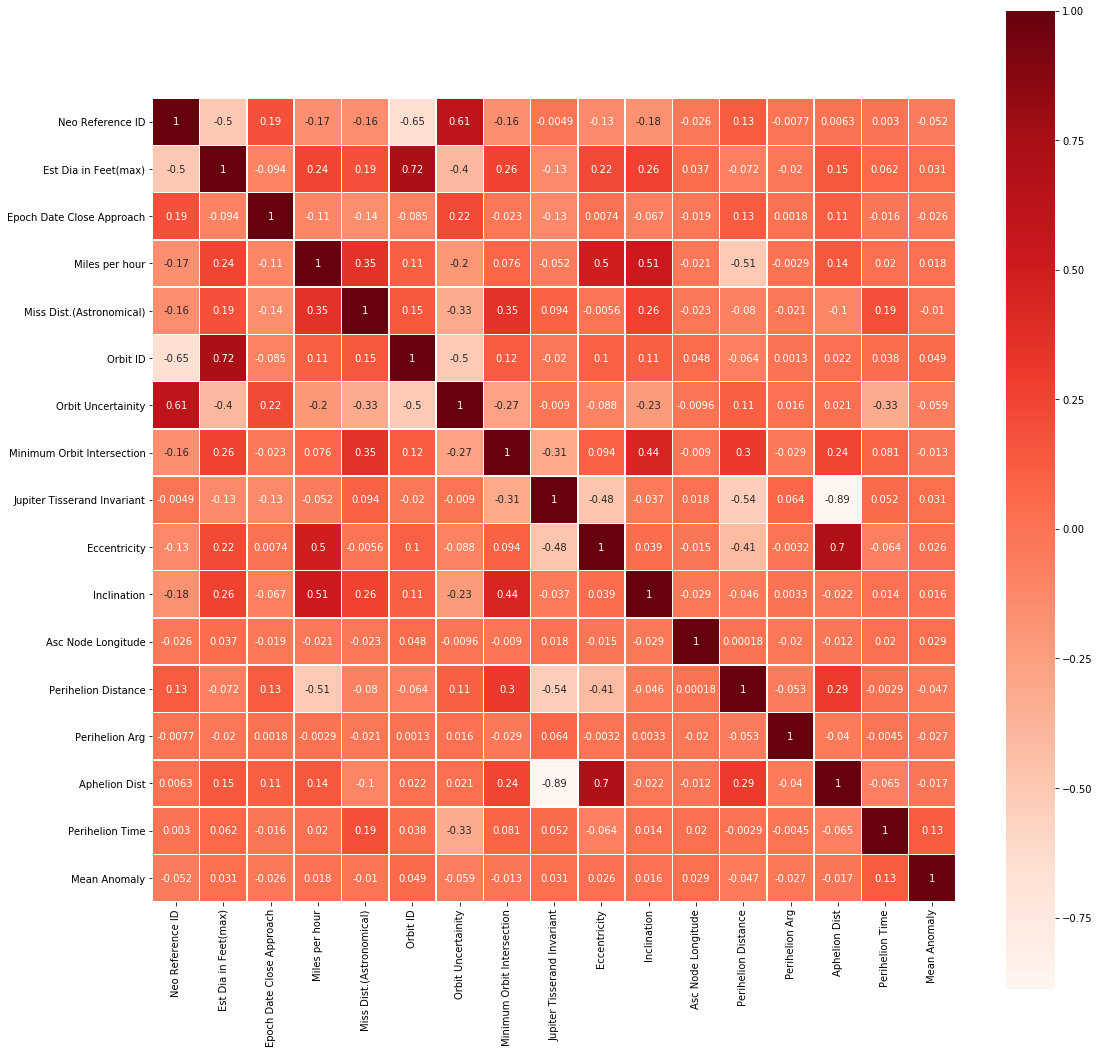

In [11]:
cor = X.corr()

fig = plt.figure(figsize=(18,18))
heatmap = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, square=True, linewidths=.5)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
fig.savefig("cor_matrix.png")

In [12]:
X.shape

(4687, 17)

### 1.3 normalization

In [13]:
# # X_ = (X-np.min(X))/(np.max(X) - np.min(X))
# X = np.asarray(X)
# X_ = np.zeros(X.shape)
# for j in range(X.shape[1]):
#     X_[:,j] = X[:,j]/np.linalg.norm(X[:,j])
# X_

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_ = scaler.fit_transform(X)
X_

array([[9.55757175e-01, 8.10148576e-03, 0.00000000e+00, ...,
        1.46942022e-01, 9.22502130e-01, 7.35825097e-01],
       [9.67475065e-01, 9.31136059e-03, 0.00000000e+00, ...,
        8.47896974e-02, 8.80541784e-01, 4.82719580e-01],
       [2.50596700e-01, 1.47954527e-02, 8.83731451e-04, ...,
        1.42185715e-01, 9.17790341e-01, 8.13777213e-01],
       ...,
       [9.87547882e-01, 4.85584688e-03, 1.00000000e+00, ...,
        1.57326285e-01, 9.38390134e-01, 5.65405913e-01],
       [9.87551250e-01, 7.38293518e-03, 1.00000000e+00, ...,
        1.20288197e-01, 9.36991902e-01, 5.65472091e-01],
       [9.94993444e-01, 2.56525981e-02, 1.00000000e+00, ...,
        1.55036850e-01, 9.40462220e-01, 5.13502733e-01]])

In [15]:
np.mean(X_, axis=0)

array([0.71394357, 0.01306885, 0.57123037, 0.30780695, 0.51350228,
       0.04475511, 0.39077353, 0.17225344, 0.41881844, 0.3936514 ,
       0.1771979 , 0.47833689, 0.60097335, 0.51092304, 0.14466579,
       0.87289051, 0.50335451])

In [16]:
y.value_counts()

-1.0    3932
 1.0     755
Name: Hazardous, dtype: int64

### 1.4 split the training set and the testing set

In [17]:
# X_train = np.asarray(X_)[:int(0.7*len(X_)), :]
# y_train = np.asarray(y)[:int(0.7*len(X_))]
# y_train = y_train.reshape((y_train.shape[0],1))

# X_test = np.asarray(X_)[int(0.7*len(X_)):, :]
# y_test = np.asarray(y)[int(0.7*len(X_)):]
# y_test = y_test.reshape((y_test.shape[0],1))
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.3, random_state=42)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3280, 17)
(1407, 17)
(3280,)
(1407,)


c:\users\carsonw\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


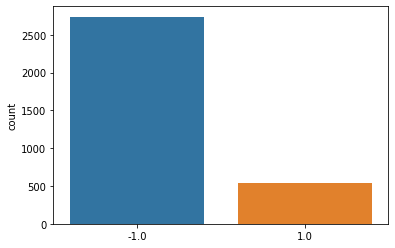

In [19]:
sns.countplot(np.asarray(y_train));

c:\users\carsonw\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


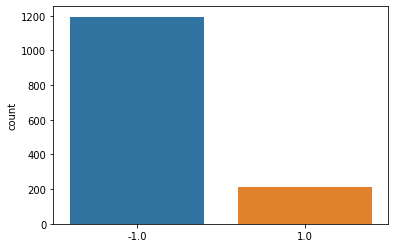

In [20]:
sns.countplot(np.asarray(y_test));

In [21]:
y_train = np.asarray(y_train).reshape((y_train.shape[0],1))
y_test = np.asarray(y_test).reshape((y_test.shape[0],1))

In [22]:
classes = ['Hazardous', 'Non-hazardous']

In [23]:
# function to plot the confusion matrix
def plot_CM(y_true, y_pred):
    plt.figure(figsize=(6,4))
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    hmap = sns.heatmap(df_cm, annot=True, fmt="d")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=0, ha='center')
    bottom, top = hmap.get_ylim()
    hmap.set_ylim(bottom + 0.5, top - 0.5)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

## 2 Linear Regression Algorithm design

### 2.1 Linear regression

#### 2.1.1 Least-Squares

In [24]:
w = np.linalg.inv(X_train.T@X_train)@X_train.T@y_train
w

array([[-0.13097959],
       [-1.79844827],
       [-0.04306325],
       [-0.17417271],
       [ 0.21404977],
       [ 1.22045947],
       [-0.78604203],
       [-2.17588444],
       [-0.4842281 ],
       [ 0.80492562],
       [ 0.80418521],
       [ 0.00523857],
       [ 0.17493342],
       [-0.02333801],
       [-0.35112727],
       [-0.32086156],
       [ 0.03585494]])

In [25]:
y_hat_train = np.sign(X_train@w)

In [26]:
er_num_train = np.sum(y_hat_train!=y_train)
err_train = er_num_train/y_train.shape[0]
acc_train = 1 - err_train
print("Training accuracy: " + str(np.round(acc_train*100,2)) + "%")

Training accuracy: 88.45%


In [27]:
y_hat_test = np.sign(X_test@w)

In [28]:
er_num_test = np.sum(y_hat_test!=y_test)
err_test = er_num_test/y_test.shape[0]
acc_test = 1 - err_test
print("Testing accuracy: " + str(np.round(acc_test*100,2)) + "%")

Testing accuracy: 88.06%


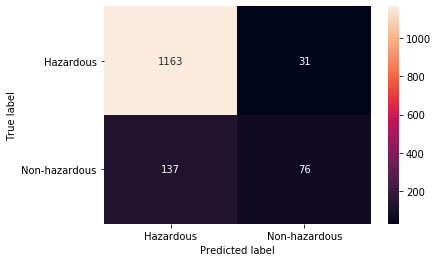

In [29]:
plot_CM(y_test, y_hat_test)

k-fold cross-validation

In [30]:
k_fold = 10
id_train = [[]] * k_fold
id_val = [[]] * k_fold
n_train = X_train.shape[0]
for m in range(k_fold):
    id_val[m] = range(m, n_train, k_fold) # Indices of k_fold validation sets.
    id_train[m] = np.setdiff1d(range(n_train), id_val[m])

In [31]:
loss = []
acc = []
W = []
for m in range(k_fold):
    X_train_cur = X_train[id_train[m]]
    y_train_cur = y_train[id_train[m]]
    X_val_cur = X_train[id_val[m]]
    y_val_cur = y_train[id_val[m]]

    w_cur = np.linalg.inv(X_train_cur.T@X_train_cur)@X_train_cur.T@y_train_cur

    y_hat_val = np.sign(X_val_cur@w_cur)

    loss_cur = np.linalg.norm(X_val_cur@w_cur-y_val_cur, 2)**2

    loss.append(loss_cur)

    er_num = np.sum(np.sign(y_hat_val) != y_val_cur)
    err = er_num/y_hat_val.shape[0]
    acc_cur = 1 - err

    acc.append(acc_cur)
    W.append(w_cur)
acc

[0.899390243902439,
 0.8841463414634146,
 0.8841463414634146,
 0.8353658536585366,
 0.9115853658536586,
 0.8810975609756098,
 0.8902439024390244,
 0.8932926829268293,
 0.8871951219512195,
 0.8689024390243902]

In [32]:
id = np.argmax(acc)
w_opt = W[id]
er_num = np.sum(np.sign(X_test@w_opt) != y_test)
err = er_num/y_test.shape[0]
acc = 1 - err
print("Testing accuracy: " + str(np.round(acc*100,2)) + "%")

Testing accuracy: 88.49%


#### 2.1.2 Least-Squares with SVD

In [33]:
U,s,VT = np.linalg.svd(X_train,full_matrices=False)

In [34]:
w = VT.T@np.diag(1/(s**2))@U.T@y_train

In [35]:
y_hat_train = np.sign(X_train@w)

In [36]:
er_num_train = np.sum(y_hat_train!=y_train)
err_train = er_num_train/y_train.shape[0]
acc_train = 1 - err_train
print("Training accuracy: " + str(np.round(acc_train*100,2)) + "%")

Training accuracy: 67.93%


In [37]:
y_hat_test = np.sign(X_test@w)

In [38]:
er_num_test = np.sum(y_hat_test!=y_test)
err_test = er_num_test/y_test.shape[0]
acc_test = 1 - err_test
print("Testing accuracy: " + str(np.round(acc_test*100,2)) + "%")

Testing accuracy: 68.59%


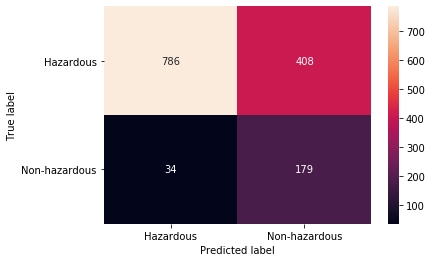

In [39]:
plot_CM(y_test, y_hat_test)

k-fold cross-validation

In [40]:
k_fold = 10
id_train = [[]] * k_fold
id_val = [[]] * k_fold
n_train = X_train.shape[0]
for m in range(k_fold):
    id_val[m] = range(m, n_train, k_fold) # Indices of k_fold validation sets.
    id_train[m] = np.setdiff1d(range(n_train), id_val[m])

In [41]:
loss = []
acc = []
W = []
for m in range(k_fold):
    X_train_cur = X_train[id_train[m]]
    y_train_cur = y_train[id_train[m]]
    X_val_cur = X_train[id_val[m]]
    y_val_cur = y_train[id_val[m]]
    
    U,s,VT = np.linalg.svd(X_train_cur,full_matrices=False)
    w_cur = VT.T@np.diag(1/(s**2))@U.T@y_train_cur

    y_hat_val = np.sign(X_val_cur@w_cur)

    loss_cur = np.linalg.norm(X_val_cur@w_cur-y_val_cur, 2)**2

    loss.append(loss_cur)

    er_num = np.sum(np.sign(y_hat_val) != y_val_cur)
    err = er_num/y_hat_val.shape[0]
    acc_cur = 1 - err

    acc.append(acc_cur)
    W.append(w_cur)
acc

[0.6798780487804879,
 0.7012195121951219,
 0.6585365853658536,
 0.7164634146341464,
 0.6798780487804879,
 0.5823170731707317,
 0.6585365853658536,
 0.6829268292682926,
 0.6615853658536586,
 0.7195121951219512]

In [42]:
id = np.argmax(acc)
w_opt = W[id]
er_num = np.sum(np.sign(X_test@w_opt) != y_test)
err = er_num/y_test.shape[0]
acc = 1 - err
print("Testing accuracy: " + str(np.round(acc*100,2)) + "%")

Testing accuracy: 68.87%


### 2.2 Ridge regression

$\min ||Xw -y||_2^2 + \lambda||w||_2^2$

#### 2.2.1 Ridge regression with least-squares

k-fold cross-validation is applied.

In [43]:
k_fold = 10
id_train = [[]] * k_fold
id_val = [[]] * k_fold
n_train = X_train.shape[0]
for m in range(k_fold):
    id_val[m] = range(m, n_train, k_fold) # Indices of k_fold validation sets.
    id_train[m] = np.setdiff1d(range(n_train), id_val[m])

In [44]:
Lambda = np.logspace(-3, 3, base=10, num=50)

Acc = []
Bias = []
Variance = []
Loss = []
loss_opt = 10**6
acc_opt = 0
lam_opt = None
lam_opt2 = None
w_opt = None

for lam in Lambda:
    bias = []
    var = []
    loss = []
    acc = []
    for m in range(k_fold):
        X_train_cur = X_train[id_train[m]]
        y_train_cur = y_train[id_train[m]]
        X_val_cur = X_train[id_val[m]]
        y_val_cur = y_train[id_val[m]]
        
        w_cur = np.linalg.inv(X_train_cur.T@X_train_cur + lam*np.eye(X_train_cur.shape[1]))@X_train_cur.T@y_train_cur
    
        y_hat_val = np.sign(X_val_cur@w_cur)
        bias_cur = np.linalg.norm(X_val_cur@w_cur-y_val_cur, 2)**2
        var_cur = np.linalg.norm(w_cur, 2)**2
    
        loss_cur = np.linalg.norm(X_val_cur@w_cur-y_val_cur, 2)**2 + np.linalg.norm(w_cur, 2)**2
        
        bias.append(bias_cur)
        var.append(var_cur)
        loss.append(loss_cur)
        
        er_num = np.sum(np.sign(y_hat_val) != y_val_cur)
        err = er_num/y_hat_val.shape[0]
        acc_cur = 1 - err
        
        acc.append(acc_cur)

    bias_mean = np.mean(bias)
    var_mean = np.mean(var)
    loss_mean = np.mean(loss)
    acc_mean = np.mean(acc)
    
    if loss_mean < loss_opt:
        loss_opt = loss_mean
        lam_opt = lam
        acc_opt = acc_mean
        w_opt = w_cur
        
    Bias.append(bias_mean)
    Variance.append(var_mean)
    Loss.append(loss_mean)
    Acc.append(acc_mean)
    print("lambda = " + str(lam) + ", loss: " + str(np.round(loss_mean,2)) + ", bias: " + str(np.round(bias_mean,2)) \
          + ", variance: " + str(np.round(var_mean,2)) + ", accuracy: ", acc_mean)

print("\nOptimal lam: " + str(lam_opt) +". Optimal loss:" + str(np.round(loss_opt,2)) + ". Testing accuracy: " + str(np.round(acc_opt, 4)))

lambda = 0.001, loss: 134.83, bias: 122.11, variance: 12.71, accuracy:  0.8835365853658537
lambda = 0.0013257113655901094, loss: 134.82, bias: 122.11, variance: 12.71, accuracy:  0.8835365853658537
lambda = 0.0017575106248547913, loss: 134.81, bias: 122.11, variance: 12.7, accuracy:  0.8835365853658537
lambda = 0.002329951810515372, loss: 134.79, bias: 122.11, variance: 12.69, accuracy:  0.8835365853658537
lambda = 0.0030888435964774815, loss: 134.78, bias: 122.11, variance: 12.67, accuracy:  0.8835365853658537
lambda = 0.004094915062380427, loss: 134.75, bias: 122.1, variance: 12.65, accuracy:  0.8835365853658537
lambda = 0.005428675439323859, loss: 134.72, bias: 122.1, variance: 12.63, accuracy:  0.8835365853658537
lambda = 0.0071968567300115215, loss: 134.68, bias: 122.09, variance: 12.59, accuracy:  0.8835365853658537
lambda = 0.009540954763499945, loss: 134.63, bias: 122.08, variance: 12.55, accuracy:  0.8835365853658537
lambda = 0.012648552168552958, loss: 134.56, bias: 122.07, v

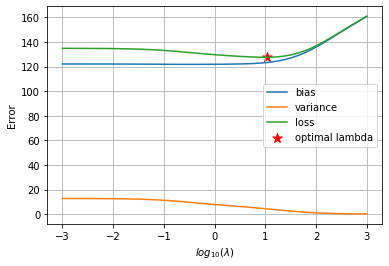

In [45]:
fig = plt.figure(figsize=(6,4))
plt.plot(np.log10(Lambda), Bias, label='bias')
plt.plot(np.log10(Lambda), Variance, label='variance')
plt.plot(np.log10(Lambda), Loss, label='loss')
plt.scatter(np.log10(lam_opt), loss_opt, marker='*', color='red',s=100, label='optimal lambda')
plt.legend()
plt.ylabel("Error")
plt.xlabel("$log_{10}(\lambda)$")
plt.grid()
plt.show()
fig.savefig("ridge.png")

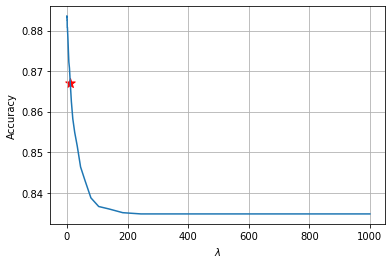

In [46]:
plt.figure()
plt.plot(Lambda, Acc, label='accuracy')
plt.ylabel("Accuracy")
plt.xlabel("$\lambda$")
plt.scatter(lam_opt, acc_opt, marker='*', color='red',s=100, label='optimal lambda')
plt.grid()
plt.show()

In [47]:
y_hat_test = np.sign(X_test@w_opt)

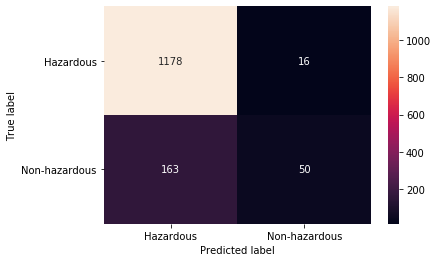

In [48]:
plot_CM(y_test, y_hat_test)

#### 2.2.2 Ridge regression with least-squares and SVD

k-fold cross-validation is applied.

In [49]:
k_fold = 10
id_train = [[]] * k_fold
id_val = [[]] * k_fold
n_train = X_train.shape[0]
for m in range(k_fold):
    id_val[m] = range(m, n_train, k_fold) # Indices of k_fold validation sets.
    id_train[m] = np.setdiff1d(range(n_train), id_val[m])

In [50]:
Lambda = np.logspace(-1, 1, base=10, num=50)

Acc = []
Bias = []
Variance = []
Loss = []
loss_opt = 10**6
acc_opt = 0
lam_opt = None
w_opt = None

for lam in Lambda:
    bias = []
    var = []
    loss = []
    acc = []
    for m in range(k_fold):
        X_train_cur = X_train[id_train[m]]
        y_train_cur = y_train[id_train[m]]
        X_val_cur = X_train[id_val[m]]
        y_val_cur = y_train[id_val[m]]
        
        U,s,VT = np.linalg.svd(X_train_cur,full_matrices=False)
#         w_cur = np.linalg.inv(X_train_cur.T@X_train_cur + lam*np.eye(X_train_cur.shape[1]))@X_train_cur.T@y_train_cur
        w_cur = VT.T@np.linalg.inv(np.diag(s**2) + lam*np.eye(len(s)))@U.T@y_train_cur
    
        y_hat_val = np.sign(X_val_cur@w_cur)
        bias_cur = np.linalg.norm(X_val_cur@w_cur-y_val_cur, 2)**2
        var_cur = np.linalg.norm(w_cur, 2)**2
    
        loss_cur = np.linalg.norm(X_val_cur@w_cur-y_val_cur, 2)**2 + np.linalg.norm(w_cur, 2)**2
        
        bias.append(bias_cur)
        var.append(var_cur)
        loss.append(loss_cur)
        
        er_num = np.sum(np.sign(y_hat_val) != y_val_cur)
        err = er_num/y_hat_val.shape[0]
        acc_cur = 1 - err
        
        acc.append(acc_cur)

    bias_mean = np.mean(bias)
    var_mean = np.mean(var)
    loss_mean = np.mean(loss)
    acc_mean = np.mean(acc)
    
    if loss_mean < loss_opt:
        loss_opt = loss_mean
        lam_opt = lam
        acc_opt = acc_mean
        w_opt = w_cur
        
    Bias.append(bias_mean)
    Variance.append(var_mean)
    Loss.append(loss_mean)
    Acc.append(acc_mean)
    print("lambda = " + str(lam) + ", loss: " + str(np.round(loss_mean,2)) + ", bias: " + str(np.round(bias_mean,2)) \
          + ", variance: " + str(np.round(var_mean,2)) + ", accuracy: ", acc_mean)

print("\nOptimal lam: " + str(lam_opt) +". Optimal loss:" + str(np.round(loss_opt,2)) + ". Testing accuracy: " + str(np.round(acc_opt, 4)))

lambda = 0.1, loss: 322.15, bias: 315.49, variance: 6.66, accuracy:  0.6740853658536585
lambda = 0.10985411419875583, loss: 321.88, bias: 315.43, variance: 6.45, accuracy:  0.6734756097560975
lambda = 0.12067926406393285, loss: 321.6, bias: 315.36, variance: 6.23, accuracy:  0.6734756097560975
lambda = 0.13257113655901093, loss: 321.31, bias: 315.3, variance: 6.01, accuracy:  0.6743902439024391
lambda = 0.14563484775012436, loss: 321.02, bias: 315.24, variance: 5.78, accuracy:  0.6743902439024391
lambda = 0.15998587196060582, loss: 320.72, bias: 315.18, variance: 5.54, accuracy:  0.6753048780487805
lambda = 0.1757510624854792, loss: 320.42, bias: 315.12, variance: 5.3, accuracy:  0.675609756097561
lambda = 0.193069772888325, loss: 320.13, bias: 315.07, variance: 5.06, accuracy:  0.6765243902439025
lambda = 0.21209508879201905, loss: 319.83, bias: 315.01, variance: 4.82, accuracy:  0.6780487804878048
lambda = 0.2329951810515372, loss: 319.54, bias: 314.96, variance: 4.57, accuracy:  0.6

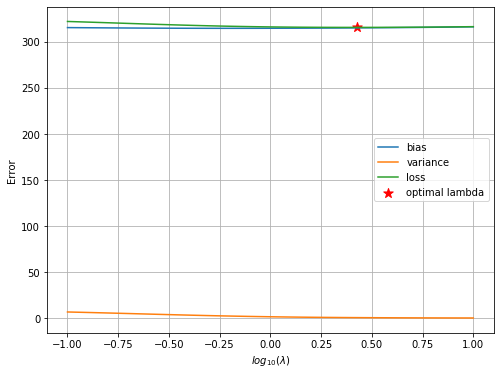

In [51]:
plt.figure(figsize=(8,6))
plt.plot(np.log10(Lambda), Bias, label='bias')
plt.plot(np.log10(Lambda), Variance, label='variance')
plt.plot(np.log10(Lambda), Loss, label='loss')
plt.scatter(np.log10(lam_opt), loss_opt, marker='*', color='red',s=100, label='optimal lambda')
plt.legend()
plt.ylabel("Error")
plt.xlabel("$log_{10}(\lambda)$")
plt.grid()
plt.show()

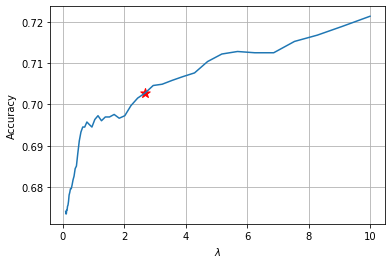

In [52]:
plt.figure()
plt.plot(Lambda, Acc, label='accuracy')
plt.ylabel("Accuracy")
plt.xlabel("$\lambda$")
plt.scatter(lam_opt, acc_opt, marker='*', color='red',s=100, label='optimal lambda')
plt.grid()
plt.show()

In [53]:
y_hat_test = np.sign(X_test@w_opt)

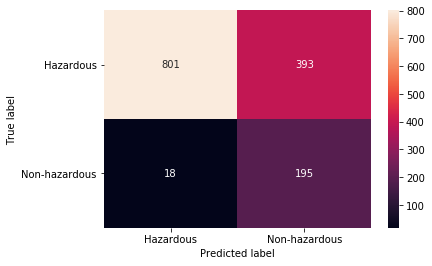

In [54]:
plot_CM(y_test, y_hat_test)

#### 2.2.3 Ridge regression with sk-learn

In [55]:
from sklearn.linear_model import Ridge

Lambda = np.logspace(-3, 3, base=10, num=50)
for lam in Lambda:
    clf = Ridge(alpha=lam)
    clf.fit(X_train, y_train)
    y_pred_train = np.sign(clf.predict(X_train))
    err_train = np.sum(y_pred_train!=y_train)
    acc_train = 1 - err_train/y_train.shape[0]
    y_pred_test = np.sign(clf.predict(X_test))
    err_test = np.sum(y_pred_test!=y_test)
    acc_test = 1 - err_test/y_test.shape[0]
    print("lambda = " + str(np.round(lam,4)) + ", training accuracy: " + str(np.round(acc_train,4)) 
          + ", testing accuracy: " + str(np.round(acc_test,4)))

lambda = 0.001, training accuracy: 0.8851, testing accuracy: 0.8806
lambda = 0.0013, training accuracy: 0.8851, testing accuracy: 0.8806
lambda = 0.0018, training accuracy: 0.8851, testing accuracy: 0.8806
lambda = 0.0023, training accuracy: 0.8851, testing accuracy: 0.8806
lambda = 0.0031, training accuracy: 0.8851, testing accuracy: 0.8806
lambda = 0.0041, training accuracy: 0.8851, testing accuracy: 0.8806
lambda = 0.0054, training accuracy: 0.8851, testing accuracy: 0.8806
lambda = 0.0072, training accuracy: 0.8851, testing accuracy: 0.8806
lambda = 0.0095, training accuracy: 0.8851, testing accuracy: 0.8806
lambda = 0.0126, training accuracy: 0.8848, testing accuracy: 0.8806
lambda = 0.0168, training accuracy: 0.8848, testing accuracy: 0.8806
lambda = 0.0222, training accuracy: 0.8848, testing accuracy: 0.8806
lambda = 0.0295, training accuracy: 0.8848, testing accuracy: 0.8799
lambda = 0.0391, training accuracy: 0.8848, testing accuracy: 0.8799
lambda = 0.0518, training accuracy:

### 2.3 Lasso regression using gradient descent

In [56]:
def ista_solve_hot_lasso(A, d, la_array):
    # ista_solve_hot: Iterative soft-thresholding for multiple values of
    # lambda with hot start for each case - the converged value for the previous
    # value of lambda is used as an initial condition for the current lambda.
    # this function solves the minimization problem
    # Minimize |Ax-d|_2^2 + lambda*|x|_1 (Lasso regression)
    # using iterative soft-thresholding.
    max_iter = 10**4
    tol = 10**(-3)
    tau = 1/np.linalg.norm(A,2)**2
    n = A.shape[1]
    w = np.zeros((n,1))
    num_lam = len(la_array)
    X = np.zeros((n, num_lam))
    for i, each_lambda in enumerate(la_array):
        w = np.zeros((n,1))
        for j in range(max_iter):
            z = w - tau*(A.T@(A@w-d))
            w_old = w
            w = np.sign(z) * np.clip(np.abs(z)-tau*each_lambda/2, 0, np.inf)
            X[:, i:i+1] = w
            if np.linalg.norm(w - w_old) < tol:
                break
    return X

In [57]:
k_fold = 10
id_train = [[]] * k_fold
id_val = [[]] * k_fold
n_train = X_train.shape[0]
for m in range(k_fold):
    id_val[m] = range(m, n_train, k_fold) # Indices of k_fold validation sets.
    id_train[m] = np.setdiff1d(range(n_train), id_val[m])

In [58]:
Lambda = np.logspace(-1, 1, base=10, num=10)

Acc = []
Bias = []
Variance = []
Loss = []
loss_opt = 10**6
acc_opt = 0
lam_opt = None
Er_num = []

# bias = []
# var = []
# loss = []
# acc = []

err2_l1 = np.zeros(k_fold)
res2_l1 = np.zeros(k_fold)

for m in range(k_fold):
    X_train_cur = X_train[id_train[m]]
    y_train_cur = y_train[id_train[m]]
    X_val_cur = X_train[id_val[m]]
    y_val_cur = y_train[id_val[m]]
    
    W = ista_solve_hot_lasso(X_train_cur, y_train_cur, Lambda)
#     print(W.shape)
    
    y_hat_val = np.sign(X_val_cur@W)
    
    err_v = np.zeros(len(Lambda))
    for i in range(len(Lambda)):
        err_v[i] = np.mean(y_hat_val!=y_val_cur)
    min_ind = np.argmin(err_v)
    
    err_num = np.sum(np.sign(X_test@W[:, min_ind:min_ind+1])!=y_test)
#     print(W)
    err = err_num/y_test.shape[0]
    acc = 1 - err
    Er_num.append(err_num)
    Acc.append(acc)
    print("Accuracy: " +str(acc) +". Number of misclassification: " +str(err_num))
    

# print()
print("Average error number: ", np.mean(Er_num))
print("Average accuracy: ", np.mean(Acc))

Accuracy: 0.8770433546552949. Number of misclassification: 173
Accuracy: 0.8734896943852168. Number of misclassification: 178
Accuracy: 0.8756218905472637. Number of misclassification: 175
Accuracy: 0.8777540867093105. Number of misclassification: 172
Accuracy: 0.8820184790334045. Number of misclassification: 166
Accuracy: 0.8777540867093105. Number of misclassification: 172
Accuracy: 0.8756218905472637. Number of misclassification: 175
Accuracy: 0.8770433546552949. Number of misclassification: 173
Accuracy: 0.8742004264392325. Number of misclassification: 177
Accuracy: 0.8763326226012793. Number of misclassification: 174
Average error number:  173.5
Average accuracy:  0.876687988628287


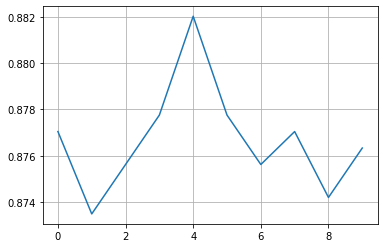

In [59]:
plt.figure()
plt.plot(Acc)
plt.grid()
plt.show()

## 3 SVM Classifier Algorithm design

### 3.1 Hinge loss with gradient descent

$\min_w \sum_{i=1}^N (1 - y_ix_i^Tw)_{+} + \lambda||w||_2^2$

$f(w)|_{w^{(k)}} = \sum_{i=1}^n(-y_ix_i I_{\{y_ix_iw^{(k)}<1\}}) + 2\lambda w^{(k)}$

$w^{(k+1)} = w^{(k)} - \tau \nabla f(w)|_{w^{(k)}}$

In [60]:
X_train.shape

(3280, 17)

In [61]:
w = np.ones((X_train.shape[1], 1))

In [62]:
w

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [63]:
X_train@w

array([[6.31167754],
       [5.66472563],
       [6.52730233],
       ...,
       [6.73486328],
       [8.10211907],
       [6.34603787]])

In [64]:
indi = np.multiply(y_train,X_train@w)
ind = np.where(indi<1, 1, 0)
np.sum(ind)

2738

In [65]:
vw = -np.multiply(np.multiply(y_train,ind),X_train)

In [66]:
vw.shape

(3280, 17)

In [67]:
lam=0.01

In [68]:
grad = np.sum(vw, axis=0).reshape(w.shape) + 2 * lam * w
grad

array([[2054.52069662],
       [  31.78606527],
       [1606.91753449],
       [ 805.22100045],
       [1395.27242448],
       [ 103.51344262],
       [1210.02      ],
       [ 529.51256936],
       [1154.18693513],
       [1028.75371064],
       [ 485.62071818],
       [1296.07515486],
       [1691.85748531],
       [1404.32055595],
       [ 385.66693305],
       [2381.66264809],
       [1351.97560302]])

In [69]:
def hinge_loss(A, d, la_array):
    # ista_solve_hot: Iterative soft-thresholding for multiple values of
    # lambda with hot start for each case - the converged value for the previous
    # value of lambda is used as an initial condition for the current lambda.
    # this function solves the minimization problem
    # Minimize |Ax-d|_2^2 + lambda*|x|_1 (Lasso regression)
    # using iterative soft-thresholding.
    max_iter = 10**4
    tol = 10**(-3)
    tau = 1/np.linalg.norm(A,2)**2
    n = A.shape[1]
    w = np.zeros((n,1))
    num_lam = len(la_array)
    X = np.zeros((n, num_lam))
    for i, each_lambda in enumerate(la_array):
#         w = np.zeros((n,1))
        for j in range(max_iter):
            w_old = w
            indi = np.multiply(d, A@w_old)
            ind = np.where(indi<1, 1, 0)
            vw = -np.multiply(np.multiply(d,ind), A)
            grad = np.sum(vw, axis=0).reshape(w_old.shape) + 2 * each_lambda * w_old
            w = w_old - tau * grad
            X[:, i:i+1] = w
            if np.linalg.norm(w - w_old) < tol:
                break
    return X

In [70]:
k_fold = 10
id_train = [[]] * k_fold
id_val = [[]] * k_fold
n_train = X_train.shape[0]
for m in range(k_fold):
    id_val[m] = range(m, n_train, k_fold) # Indices of k_fold validation sets.
    id_train[m] = np.setdiff1d(range(n_train), id_val[m])

In [71]:
Lambda = np.logspace(-2, 2, base=10, num=20)

Acc = []
acc_opt = 0
lam_opt = None
Er_num = []

A = X_train
d = y_train

lam = 0.1
max_iter = 10**2
tol = 10**(-2)
tau = 1/np.linalg.norm(A,2)**2

for lam in Lambda:
    w = np.zeros((A.shape[1],1))
    W = np.zeros((w.shape[0], max_iter))

    grad = np.zeros(w.shape)
    Err_num = []

    for j in range(max_iter):
        w_old = w
        for k in range(A.shape[0]):
            xi = A[k:k+1,:]
            di = d[k:k+1,:]
            if di@xi@w_old < 1:
                vi = -(di@xi).T
            else:
                vi = np.zeros(w_old.shape)
            grad += vi

        grad += 2*lam*w_old
        w = w_old - tau * grad
        W[:,j:j+1] = w

        err_num = np.sum(np.sign(X_test@w) != y_test)
        Err_num.append(err_num)

    #     print(np.linalg.norm(w - w_old))
        if np.linalg.norm(w - w_old) < tol:
            break

#     print(Err_num)
    min_ind = np.argmin(Err_num)
#     print(min_ind)
    
    err_num = Err_num[min_ind]
    Er_num.append(err_num)
    acc = 1 - err_num/y_test.shape[0]
    Acc.append(acc)
    print("Lambda =", lam, "Accuracy: " +str(acc) +". Number of misclassification: " +str(err_num))


# print()
# print("Average error number: ", np.mean(Er_num))
# print("Average accuracy: ", np.mean(Acc))

Lambda = 0.01 Accuracy: 0.8905472636815921. Number of misclassification: 154
Lambda = 0.016237767391887217 Accuracy: 0.8919687277896233. Number of misclassification: 152
Lambda = 0.026366508987303583 Accuracy: 0.8919687277896233. Number of misclassification: 152
Lambda = 0.04281332398719394 Accuracy: 0.8912579957356077. Number of misclassification: 153
Lambda = 0.06951927961775606 Accuracy: 0.8941009239516702. Number of misclassification: 149
Lambda = 0.11288378916846889 Accuracy: 0.8933901918976546. Number of misclassification: 150
Lambda = 0.18329807108324356 Accuracy: 0.8912579957356077. Number of misclassification: 153
Lambda = 0.29763514416313175 Accuracy: 0.8891257995735607. Number of misclassification: 156
Lambda = 0.4832930238571752 Accuracy: 0.8933901918976546. Number of misclassification: 150
Lambda = 0.7847599703514611 Accuracy: 0.892679459843639. Number of misclassification: 151
Lambda = 1.2742749857031335 Accuracy: 0.892679459843639. Number of misclassification: 151
Lambda

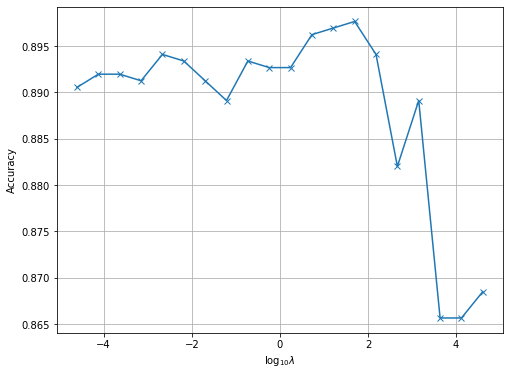

In [72]:
plt.figure(figsize=(8,6))
plt.plot(np.log(Lambda), Acc, '-x')
plt.ylabel("Accuracy")
plt.xlabel("$\log_{10}{\lambda}$")
plt.grid()
plt.show()

In [73]:
id = np.argmax(Acc)
print(np.max(Acc)*100)
print(Lambda[id])

89.76545842217483
5.455594781168514


### 3.2 Kernel based SVM with sk-learn

In [74]:
from sklearn import svm

#### 3.2.1 linear SVC

In [75]:
Lambda = np.logspace(-2, 2, base=10, num=50)

In [76]:
Acc_train = []
Acc_test = []
for lam in Lambda:
    lin_svc = svm.LinearSVC(C=lam,max_iter=20000)
    lin_svc.fit(X_train, y_train.flatten())
    acc_lin_svc_train = lin_svc.score(X_train, y_train)
    acc_lin_svc_test = lin_svc.score(X_test, y_test)
    Acc_train.append(acc_lin_svc_train)
    Acc_test.append(acc_lin_svc_test)
    print("lambda:", np.round(lam,4), ", Training accuracy:", np.round(acc_lin_svc_train,3),
          ", Testing accuracy:", np.round(acc_lin_svc_test,3))

lambda: 0.01 , Training accuracy: 0.855 , Testing accuracy: 0.874
lambda: 0.0121 , Training accuracy: 0.859 , Testing accuracy: 0.876
lambda: 0.0146 , Training accuracy: 0.865 , Testing accuracy: 0.877
lambda: 0.0176 , Training accuracy: 0.871 , Testing accuracy: 0.879
lambda: 0.0212 , Training accuracy: 0.877 , Testing accuracy: 0.883
lambda: 0.0256 , Training accuracy: 0.882 , Testing accuracy: 0.888
lambda: 0.0309 , Training accuracy: 0.887 , Testing accuracy: 0.893
lambda: 0.0373 , Training accuracy: 0.895 , Testing accuracy: 0.896
lambda: 0.045 , Training accuracy: 0.898 , Testing accuracy: 0.901
lambda: 0.0543 , Training accuracy: 0.899 , Testing accuracy: 0.906
lambda: 0.0655 , Training accuracy: 0.903 , Testing accuracy: 0.91
lambda: 0.0791 , Training accuracy: 0.906 , Testing accuracy: 0.915
lambda: 0.0954 , Training accuracy: 0.908 , Testing accuracy: 0.913
lambda: 0.1151 , Training accuracy: 0.91 , Testing accuracy: 0.912
lambda: 0.1389 , Training accuracy: 0.911 , Testing a

c:\users\carsonw\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


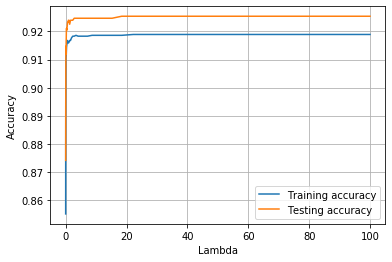

In [77]:
plt.figure()
plt.plot(Lambda, Acc_train, label='Training accuracy')
plt.plot(Lambda, Acc_test, label='Testing accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Lambda')
plt.grid()
plt.show()

In [78]:
print("Average training accuracy:", np.round(np.mean(Acc_train)*100, 2), "%")
print("Average training accuracy:", np.round(np.mean(Acc_test)*100, 2), "%")

Average training accuracy: 90.86 %
Average training accuracy: 91.53 %


In [79]:
# # y_train_pred = lin_svc.predict(X_train)
# # print("Training Accuracy:", 100 - np.sum(np.abs(y_train - y_train_pred))/len(y_train_pred)*100, "%")
# acc_lin_svc_train = lin_svc.score(X_train, y_train)
# print(acc_lin_svc_train)

In [80]:
# # y_test_pred = lin_svc.predict(X_test)
# # print("Testing Accuracy:", 100 - np.sum(np.abs(y_test - y_test_pred))/len(y_test_pred)*100, "%")
# acc_lin_svc_test = lin_svc.score(X_test, y_test)
# print(acc_lin_svc_train)

#### 3.2.2 SVC kernel=linear

In [81]:
Lambda = np.logspace(-2, 2, base=10, num=50)

In [82]:
Acc_train = []
Acc_test = []
for lam in Lambda:
    linear_svc = svm.SVC(kernel='linear', C=lam)
    linear_svc.fit(X_train, y_train.flatten())
    acc_linear_svc_train = linear_svc.score(X_train, y_train)
    acc_linear_svc_test = linear_svc.score(X_test, y_test)
    Acc_train.append(acc_linear_svc_train)
    Acc_test.append(acc_linear_svc_test)
    print("lambda:", np.round(lam,4), ", Training accuracy:", np.round(acc_linear_svc_train,3),
          ", Testing accuracy:", np.round(acc_linear_svc_test,3))

lambda: 0.01 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0121 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0146 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0176 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0212 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0256 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0309 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0373 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.045 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0543 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0655 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0791 , Training accuracy: 0.841 , Testing accuracy: 0.855
lambda: 0.0954 , Training accuracy: 0.853 , Testing accuracy: 0.869
lambda: 0.1151 , Training accuracy: 0.868 , Testing accuracy: 0.88
lambda: 0.1389 , Training accuracy: 0.882 , Testing 

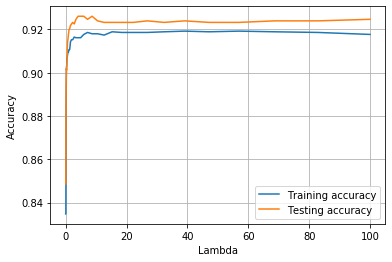

In [83]:
plt.figure()
plt.plot(Lambda, Acc_train, label='Training accuracy')
plt.plot(Lambda, Acc_test, label='Testing accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Lambda')
plt.grid()
plt.show()

In [84]:
print("Average training accuracy:", np.round(np.mean(Acc_train)*100, 2), "%")
print("Average training accuracy:", np.round(np.mean(Acc_test)*100, 2), "%")

Average training accuracy: 89.16 %
Average training accuracy: 89.95 %


In [85]:
# # y_train_pred = linear_svc.predict(X_train)
# # print("Training Accuracy:", 100 - np.sum(np.abs(y_train - y_train_pred))/len(y_train_pred)*100, "%")
# acc_linear_svc_train = linear_svc.score(X_train, y_train)
# print(acc_linear_svc_train)

In [86]:
# # y_test_pred = linear_svc.predict(X_test)
# # print("Testing Accuracy:", 100 - np.sum(np.abs(y_test - y_test_pred))/len(y_test_pred)*100, "%")
# acc_linear_svc_test = linear_svc.score(X_test, y_test)
# print(acc_linear_svc_test)

#### 3.2.3 SVC kernel=rbf

In [87]:
Lambda = np.logspace(-2, 2, base=10, num=50)

In [88]:
Acc_train = []
Acc_test = []
for lam in Lambda:
    rbf_svc = svm.SVC(kernel='rbf', gamma='scale', C=lam)
    rbf_svc.fit(X_train, y_train.flatten())
    acc_rbf_svc_train = rbf_svc.score(X_train, y_train)
    acc_rbf_svc_test = rbf_svc.score(X_test, y_test)
    Acc_train.append(acc_rbf_svc_train)
    Acc_test.append(acc_rbf_svc_test)
    print("lambda:", np.round(lam,4), ", Training accuracy:", np.round(acc_rbf_svc_train,3),
          ", Testing accuracy:", np.round(acc_rbf_svc_test,3))

lambda: 0.01 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0121 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0146 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0176 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0212 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0256 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0309 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0373 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.045 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0543 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0655 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0791 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0954 , Training accuracy: 0.836 , Testing accuracy: 0.849
lambda: 0.1151 , Training accuracy: 0.841 , Testing accuracy: 0.855
lambda: 0.1389 , Training accuracy: 0.857 , Testing

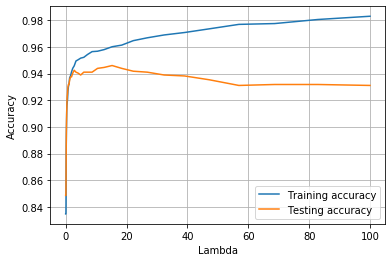

In [89]:
plt.figure()
plt.plot(Lambda, Acc_train, label='Training accuracy')
plt.plot(Lambda, Acc_test, label='Testing accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Lambda')
plt.grid()
plt.show()

In [90]:
print("Average training accuracy:", np.round(np.mean(Acc_train)*100, 2), "%")
print("Average training accuracy:", np.round(np.mean(Acc_test)*100, 2), "%")

Average training accuracy: 91.17 %
Average training accuracy: 90.65 %


In [91]:
# # y_train_pred = rbf_svc.predict(X_train)
# # print("Training Accuracy:", 100 - np.sum(np.abs(y_train - y_train_pred))/len(y_train_pred)*100, "%")
# acc_rbf_svc_train = rbf_svc.score(X_train, y_train)
# print(acc_rbf_svc_train)

In [92]:
# # y_test_pred = rbf_svc.predict(X_test)
# # print("Testing Accuracy:", 100 - np.sum(np.abs(y_test - y_test_pred))/len(y_test_pred)*100, "%")
# acc_rbf_svc_test = rbf_svc.score(X_test, y_test)
# print(acc_rbf_svc_test)

#### 3.2.4 SVC kernel=poly

In [93]:
Lambda = np.logspace(-2, 2, base=10, num=50)

In [94]:
Acc_train = []
Acc_test = []
for lam in Lambda:
    poly_svc = svm.SVC(kernel='poly', gamma='scale',C=lam, max_iter=-1)
    poly_svc.fit(X_train, y_train.flatten())
    acc_poly_svc_train = poly_svc.score(X_train, y_train)
    acc_poly_svc_test = poly_svc.score(X_test, y_test)
    Acc_train.append(acc_poly_svc_train)
    Acc_test.append(acc_poly_svc_test)
    print("lambda:", np.round(lam,4), ", Training accuracy:", np.round(acc_poly_svc_train,3),
          ", Testing accuracy:", np.round(acc_poly_svc_test,3))

lambda: 0.01 , Training accuracy: 0.836 , Testing accuracy: 0.853
lambda: 0.0121 , Training accuracy: 0.841 , Testing accuracy: 0.856
lambda: 0.0146 , Training accuracy: 0.851 , Testing accuracy: 0.865
lambda: 0.0176 , Training accuracy: 0.86 , Testing accuracy: 0.876
lambda: 0.0212 , Training accuracy: 0.881 , Testing accuracy: 0.89
lambda: 0.0256 , Training accuracy: 0.892 , Testing accuracy: 0.902
lambda: 0.0309 , Training accuracy: 0.899 , Testing accuracy: 0.915
lambda: 0.0373 , Training accuracy: 0.91 , Testing accuracy: 0.92
lambda: 0.045 , Training accuracy: 0.915 , Testing accuracy: 0.922
lambda: 0.0543 , Training accuracy: 0.921 , Testing accuracy: 0.927
lambda: 0.0655 , Training accuracy: 0.922 , Testing accuracy: 0.93
lambda: 0.0791 , Training accuracy: 0.922 , Testing accuracy: 0.93
lambda: 0.0954 , Training accuracy: 0.924 , Testing accuracy: 0.934
lambda: 0.1151 , Training accuracy: 0.927 , Testing accuracy: 0.933
lambda: 0.1389 , Training accuracy: 0.928 , Testing accur

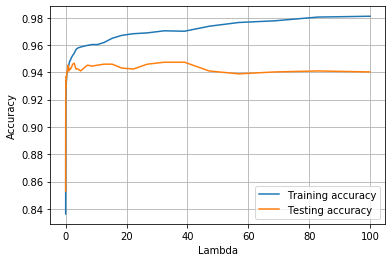

In [95]:
plt.figure()
plt.plot(Lambda, Acc_train, label='Training accuracy')
plt.plot(Lambda, Acc_test, label='Testing accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Lambda')
plt.grid()
plt.show()

In [96]:
print("Average training accuracy:", np.round(np.mean(Acc_train)*100, 2), "%")
print("Average training accuracy:", np.round(np.mean(Acc_test)*100, 2), "%")

Average training accuracy: 93.75 %
Average training accuracy: 93.14 %


In [97]:
# # y_train_pred = poly_svc.predict(X_train)
# # print("Training Accuracy:", 100 - np.sum(np.abs(y_train - y_train_pred))/len(y_train_pred)*100, "%")
# acc_poly_svc_train = poly_svc.score(X_train, y_train)
# print(acc_poly_svc_train)

In [98]:
# # y_test_pred = poly_svc.predict(X_test)
# # print("Testing Accuracy:", 100 - np.sum(np.abs(y_test - y_atest_pred))/len(y_test_pred)*100, "%")
# acc_poly_svc_test = poly_svc.score(X_test, y_test)
# print(acc_poly_svc_test)

#### 3.2.5 SVC kernel=sigmoid

In [99]:
Lambda = np.logspace(-2, 2, base=10, num=50)

In [100]:
Acc_train = []
Acc_test = []
for lam in Lambda:
    sigmoid_svc = svm.SVC(kernel='sigmoid', gamma='scale', C=lam)
    sigmoid_svc.fit(X_train, y_train.flatten())
    acc_sigmoid_svc_train = sigmoid_svc.score(X_train, y_train)
    acc_sigmoid_svc_test = sigmoid_svc.score(X_test, y_test)
    Acc_train.append(acc_sigmoid_svc_train)
    Acc_test.append(acc_sigmoid_svc_test)
    print("lambda:", np.round(lam,4), ", Training accuracy:", np.round(acc_sigmoid_svc_train,3),
          ", Testing accuracy:", np.round(acc_sigmoid_svc_test,3))

lambda: 0.01 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0121 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0146 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0176 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0212 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0256 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0309 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0373 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.045 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0543 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0655 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0791 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.0954 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.1151 , Training accuracy: 0.835 , Testing accuracy: 0.849
lambda: 0.1389 , Training accuracy: 0.836 , Testing

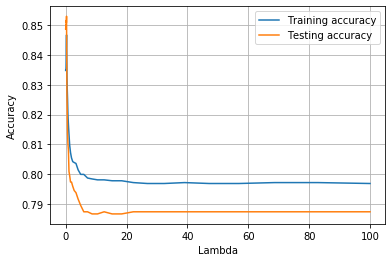

In [101]:
plt.figure()
plt.plot(Lambda, Acc_train, label='Training accuracy')
plt.plot(Lambda, Acc_test, label='Testing accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Lambda')
plt.grid()
plt.show()

In [102]:
print("Average training accuracy:", np.round(np.mean(Acc_train)*100, 2), "%")
print("Average training accuracy:", np.round(np.mean(Acc_test)*100, 2), "%")

Average training accuracy: 81.74 %
Average training accuracy: 81.63 %


In [103]:
# # y_train_pred = sigmoid_svc.predict(X_train)
# # print("Training Accuracy:", 100 - np.sum(np.abs(y_train - y_train_pred))/len(y_train_pred)*100, "%")
# acc_sigmoid_svc_train = sigmoid_svc.score(X_train, y_train)
# print(acc_sigmoid_svc_train)

In [104]:
# # y_test_pred = sigmoid_svc.predict(X_test)
# # print("Testing Accuracy:", 100 - np.sum(np.abs(y_test - y_test_pred))/len(y_test_pred)*100, "%")
# acc_sigmoid_svc_test = sigmoid_svc.score(X_test, y_test)
# print(acc_sigmoid_svc_test)

#### chosen kernel: rbf

In [105]:
Lambda = np.logspace(-1, 3, base=10, num=50)

In [106]:
Acc_train = []
Acc_test = []
for lam in Lambda:
    rbf_svc = svm.SVC(kernel='rbf', gamma='scale', C=lam)
    rbf_svc.fit(X_train, y_train.flatten())
    acc_rbf_svc_train = rbf_svc.score(X_train, y_train)
    acc_rbf_svc_test = rbf_svc.score(X_test, y_test)
    Acc_train.append(acc_rbf_svc_train)
    Acc_test.append(acc_rbf_svc_test)
    print("lambda:", np.round(lam,4), ", Training accuracy:", np.round(acc_rbf_svc_train,3),
          ", Testing accuracy:", np.round(acc_rbf_svc_test,3))

lambda: 0.1 , Training accuracy: 0.836 , Testing accuracy: 0.85
lambda: 0.1207 , Training accuracy: 0.844 , Testing accuracy: 0.856
lambda: 0.1456 , Training accuracy: 0.862 , Testing accuracy: 0.871
lambda: 0.1758 , Training accuracy: 0.877 , Testing accuracy: 0.876
lambda: 0.2121 , Training accuracy: 0.889 , Testing accuracy: 0.891
lambda: 0.256 , Training accuracy: 0.897 , Testing accuracy: 0.9
lambda: 0.3089 , Training accuracy: 0.905 , Testing accuracy: 0.905
lambda: 0.3728 , Training accuracy: 0.913 , Testing accuracy: 0.911
lambda: 0.4498 , Training accuracy: 0.916 , Testing accuracy: 0.92
lambda: 0.5429 , Training accuracy: 0.92 , Testing accuracy: 0.924
lambda: 0.6551 , Training accuracy: 0.921 , Testing accuracy: 0.926
lambda: 0.7906 , Training accuracy: 0.929 , Testing accuracy: 0.93
lambda: 0.9541 , Training accuracy: 0.93 , Testing accuracy: 0.933
lambda: 1.1514 , Training accuracy: 0.933 , Testing accuracy: 0.933
lambda: 1.3895 , Training accuracy: 0.937 , Testing accurac

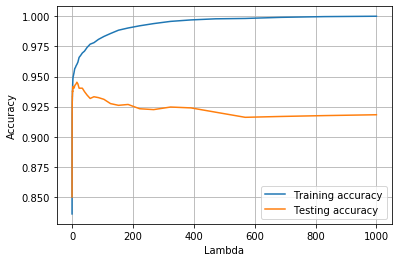

In [107]:
plt.figure()
plt.plot(Lambda, Acc_train, label='Training accuracy')
plt.plot(Lambda, Acc_test, label='Testing accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Lambda')
plt.grid()
plt.show()

## 4 Neural networks

### 4.1 Backpropagation neural network with SGD

Network architecture:

* input layer size: $m = 21$
* hidden layer size: $p = 50$
* output layer size: $o = 1$

#### forward

$z_k = \sum_{j=1}^m w_{kj} x_j$, $h_k = \sigma(z_k) = \sigma(\sum_{j=1}^m w_{kj} x_j)$

$d = \sum_{k=1}^p v_{k} h_k$, $\hat{y} = \sigma(d) = \sigma(\sum_{k=1}^p v_{k} h_k)$

#### backpropagation

loss: $f = \sum_{i=1}^N \frac{1}{2}(\hat{y}^i - y^i)^2$

$\hat{y}^i = \sigma(d^i) = \sigma(\sum_{k=1}^P v_{k} h_k^i )$

$\begin{align}
\frac{\partial f^i}{\partial v_k} 
&= \frac{\partial f^i}{\partial \hat{y}^i} \frac{\partial \hat{y}^i}{\partial d^i} \frac{\partial d^i}{\partial v_k^i}
\end{align}$

$\begin{align}
\frac{\partial f^i}{\partial w_{kj}^i}
&= \frac{\partial f^i}{\partial \hat{y}^i} \frac{\partial \hat{y}^i}{\partial d^i} \frac{\partial d^i}{\partial h_k^i} \frac{\partial h_k^i}{\partial z_{k}^i} \frac{\partial z_{k}^i}{\partial w_{kj}^i}
\end{align}$

$\begin{align}\frac{\partial f^i}{\partial \hat{y}^i} 
&= \frac{\partial \frac{1}{2}(\hat{y}^i - y^i)^2}{\partial \hat{y}^i} \\
&= (\hat{y}^i - y^i)
\end{align}$

$\begin{align}\frac{\partial y^i}{\partial d^i}
&= \frac{\partial \sigma(d^i)}{\partial d^i} \\
&= \sigma(d^i) (1 - \sigma(d^i)) \\
&= \hat{y}^i (1 - \hat{y}^i)
\end{align}$

$\begin{align}\frac{\partial d^i}{\partial v_k^i}
&= \frac{\partial \sum_{k=1}^P v_{k}^i h_k^i}{\partial v_k^i} \\
&= h_k^i
\end{align}$

$\begin{align}\frac{\partial d^i}{\partial h_k^i}
&= \frac{\partial \sum_{k=1}^P v_{k}^i h_k^i}{\partial h_k^i} \\
&= v_{k}^i
\end{align}$

$\begin{align}\frac{\partial h_k^i}{\partial z_k^i}
&= \frac{\partial \sigma(z_k^i)}{\partial z_k^i} \\
&= \sigma(z_k^i)(1-\sigma(z_k^i)) \\
&= h_k^i (1 - h_k^i)
\end{align}$

$\begin{align}\frac{\partial z_k^i}{\partial w_{kj}^i}
&= \frac{\partial \sum_{j=1}^m w_{kj^i} x_j^i}{\partial w_{kj}^i} \\
&= x_j^i
\end{align}$

So,

$\begin{align}
\frac{\partial f^i}{\partial v_k} 
&= \frac{\partial f^i}{\partial \hat{y}^i} \frac{\partial \hat{y}^i}{\partial d^i} \frac{\partial d^i}{\partial v_k^i} \\
&= (\hat{y}^i - y^i) \hat{y}^i (1 - \hat{y}^i) h_k^i
\end{align}$

$\begin{align}
\frac{\partial f^i}{\partial w_{kj}^i}
&= \frac{\partial f^i}{\partial \hat{y}^i} \frac{\partial \hat{y}^i}{\partial d^i} \frac{\partial d^i}{\partial h_k^i} \frac{\partial h_k^i}{\partial z_{k}^i} \frac{\partial z_{k}^i}{\partial w_{kj}^i} \\
&= (\hat{y}^i - y^i) \hat{y}^i (1 - \hat{y}^i) v_{k}^i h_k^i (1 - h_k^i) x_j^i
\end{align}$

In [108]:
# X_ = (X-np.min(X))/(np.max(X) - np.min(X))
X = np.asarray(X)
X_ = np.zeros(X.shape)
for j in range(X.shape[1]):
    X_[:,j] = X[:,j]/np.linalg.norm(X[:,j])
X_

array([[0.01630215, 0.00439934, 0.00963216, ..., 0.01329797, 0.01460929,
        0.01836362],
       [0.01639405, 0.00505112, 0.00963216, ..., 0.00992726, 0.01460711,
        0.01204707],
       [0.01077188, 0.00800549, 0.00963955, ..., 0.01304002, 0.01460904,
        0.02030901],
       ...,
       [0.01655148, 0.00265087, 0.01798756, ..., 0.01386114, 0.01461011,
        0.0141106 ],
       [0.0165515 , 0.00401225, 0.01798756, ..., 0.01185245, 0.01461004,
        0.01411225],
       [0.01660987, 0.0138544 , 0.01798756, ..., 0.01373697, 0.01461022,
        0.0128153 ]])

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.3, random_state=42)

In [110]:
y_train = np.asarray(y_train).reshape((y_train.shape[0],1))
y_test = np.asarray(y_test).reshape((y_test.shape[0],1))

In [111]:
y_train_ = np.sign(y_train)/2+.5
y_test_ = np.sign(y_test)/2+.5
p = X_train.shape[1] #features
n = X_train.shape[0] #examples
nt = X_test.shape[0] #examples

## Train NN
Xb = np.hstack((np.ones((n,1)), X_train))
Xb_test = np.hstack((np.ones((nt,1)), X_test))
M = 64 #number of hidden nodes

## initial weights
V = np.random.randn(M+1, 1); 
W = np.random.randn(p+1, M);

alpha = 0.5 #step size
L = 2000 #number of epochs

def sigmoid(_x):
    return 1/(1+np.exp(-_x))

Acc_train = []
Acc_test = []
W_list = []
V_list = []

for epoch in range(L):
    ind = np.random.permutation(n)
    for i in ind:
        # Forward-propagate
        H = sigmoid(np.hstack((np.ones((1,1)), Xb[[i],:]@W)))
        Yhat = sigmoid(H@V)

         # Backpropagate
        delta = (Yhat - y_train_[[i],:]) * Yhat * (1 - Yhat)
        Vnew = V - alpha * H.T@delta
        gamma = delta@V[1:,:].T * H[:,1:] * (1 - H[:,1:])
        Wnew = W - alpha* Xb[[i],:].T@gamma
        V = Vnew
        W = Wnew
        
    H = sigmoid(np.hstack((np.ones((n,1)), Xb@W)))
    Yhat = sigmoid(H@V)
    err_train = np.sum(abs(np.round(Yhat)-y_train_))
    acc_train = 1 - err_train/n
    
    H_test = sigmoid(np.hstack((np.ones((nt,1)), Xb_test@W)))
    Yhat_test = sigmoid(H_test@V)
    err_test = np.sum(abs(np.round(Yhat_test)-y_test_))
    acc_test = 1 - err_test/nt
    
    
    if epoch %100 ==0:
        print("Epoch:", epoch, "Training accuracy:", acc_train, "Testing accuracy:", acc_test)
        
    Acc_train.append(acc_train)
    Acc_test.append(acc_test)
    W_list.append(W)
    V_list.append(V)

Epoch: 0 Training accuracy: 0.8347560975609756 Testing accuracy: 0.8486140724946695
Epoch: 100 Training accuracy: 0.8978658536585366 Testing accuracy: 0.9047619047619048
Epoch: 200 Training accuracy: 0.8692073170731707 Testing accuracy: 0.8848614072494669
Epoch: 300 Training accuracy: 0.9097560975609756 Testing accuracy: 0.914001421464108
Epoch: 400 Training accuracy: 0.8914634146341464 Testing accuracy: 0.900497512437811
Epoch: 500 Training accuracy: 0.901829268292683 Testing accuracy: 0.8997867803837953
Epoch: 600 Training accuracy: 0.9192073170731707 Testing accuracy: 0.9246624022743426
Epoch: 700 Training accuracy: 0.8826219512195121 Testing accuracy: 0.8948116560056858
Epoch: 800 Training accuracy: 0.9045731707317073 Testing accuracy: 0.9012082444918266
Epoch: 900 Training accuracy: 0.9128048780487805 Testing accuracy: 0.9154228855721394
Epoch: 1000 Training accuracy: 0.9240853658536585 Testing accuracy: 0.9282160625444208
Epoch: 1100 Training accuracy: 0.9246951219512195 Testing 

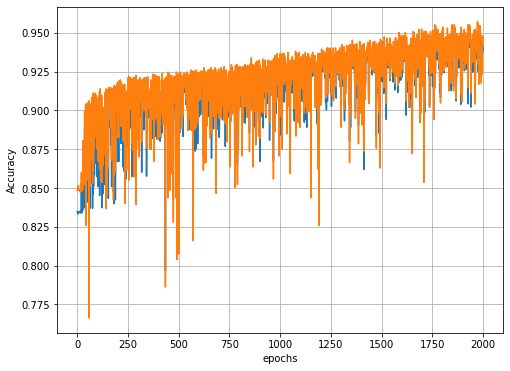

In [112]:
plt.figure(figsize=(8,6))
plt.plot(Acc_train, '-')
plt.plot(Acc_test, '-')
plt.ylabel("Accuracy")
plt.xlabel("epochs")
plt.grid()
plt.show()

In [113]:
id = np.argmax(Acc_test)
print(np.max(Acc_test))
id

0.9573560767590619


1972

In [114]:
W_opt = W_list[id]
V_opt = V_list[id]

In [115]:
Xb_test = np.hstack((np.ones((X_test.shape[0],1)), X_test))
H_test = sigmoid(np.hstack((np.ones((X_test.shape[0],1)), Xb_test@W_opt)))
Yhat_test = sigmoid(H_test@V_opt)
y_pred_test = np.round(Yhat_test)
y_test_ = np.sign(y_test)/2+.5

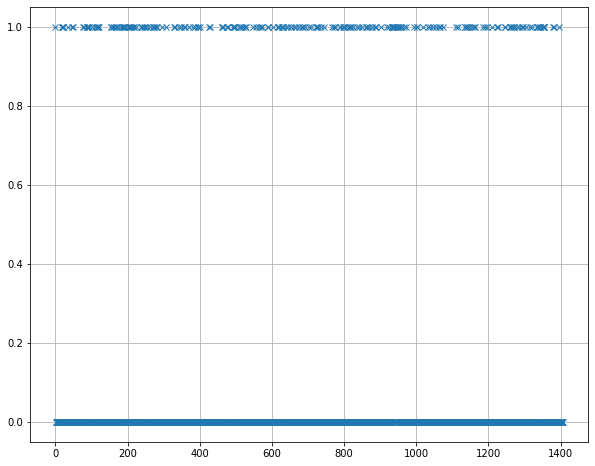

In [116]:
plt.figure(figsize=(10,8))
plt.plot(y_pred_test, 'x')
plt.grid()
plt.show()

In [117]:
err = np.sum(abs(y_pred_test - y_test_))
acc = 1 - err/n
print("Test accuracy:", acc*100, "%")

Test accuracy: 98.17073170731707 %


In [118]:
from sklearn.metrics import confusion_matrix, classification_report
classes = ['Hazardous', 'Non-hazardous']
print(classification_report(y_test_, y_pred_test, target_names=classes))

               precision    recall  f1-score   support

    Hazardous       0.97      0.98      0.97      1194
Non-hazardous       0.88      0.84      0.86       213

     accuracy                           0.96      1407
    macro avg       0.92      0.91      0.92      1407
 weighted avg       0.96      0.96      0.96      1407



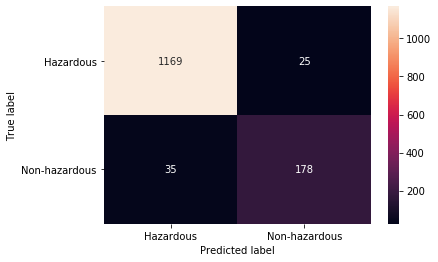

In [119]:
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test_, y_pred_test)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=0, ha='center')
bottom, top = hmap.get_ylim()
hmap.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### 4.2 Neural network with Pytorch

In [120]:
import torch
from torch import nn, optim
import torch.nn.functional as F

In [121]:
# y_train[y_==False] = 0
X_train_t = torch.from_numpy(X_train).float()
y_train_t = torch.squeeze(torch.from_numpy(y_train).float())
y_train_t[y_train_t==-1] = 0
X_test_t = torch.from_numpy(X_test).float()
y_test_t = torch.squeeze(torch.from_numpy(y_test).float())
y_test_t[y_test_t==-1] = 0

In [122]:
X_train_t.shape, y_train_t.shape

(torch.Size([3280, 17]), torch.Size([3280]))

c:\users\carsonw\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


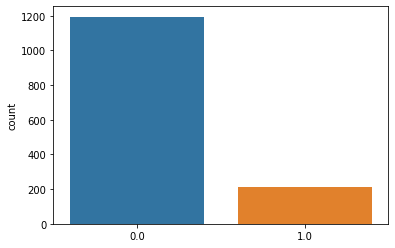

In [123]:
sns.countplot(np.asarray(y_test_t));

In [124]:
torch.cuda.empty_cache()

In [125]:
n_feature = X_train_t.shape[1]
hidden_size = [64, 16]
output_size = 1

In [126]:
class Net(nn.Module):
    def __init__(self, n_features):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_features, hidden_size[0])
        self.fc2 = nn.Linear(hidden_size[0], hidden_size[1])
        self.fc3 = nn.Linear(hidden_size[1], output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return torch.sigmoid(self.fc3(x))
    
net = Net(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.003)

In [127]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
X_train_t = X_train_t.to(device)
y_train_t = y_train_t.to(device)
X_test_t = X_test_t.to(device)
y_test_t = y_test_t.to(device)
net = net.to(device)
criterion = criterion.to(device)

In [128]:
def calculate_accuracy(y_true, y_pred):
    predicted = y_pred.ge(.5).view(-1)
    return (y_true == predicted).sum().float() / len(y_true)

def round_tensor(t, decimal_places=3):
    return round(t.item(), decimal_places)

In [129]:
Train_loss = []
Test_loss = []
Train_acc = []
Test_acc = []

for epoch in range(2000):
    y_pred = net(X_train_t)
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, y_train_t)
    train_acc = calculate_accuracy(y_train_t, y_pred)
    
    y_test_pred = net(X_test_t)
    y_test_pred = torch.squeeze(y_test_pred)
    test_loss = criterion(y_test_pred, y_test_t)
    test_acc = calculate_accuracy(y_test_t, y_test_pred)

    Train_loss.append(train_loss)
    Test_loss.append(test_loss)
    Train_acc.append(train_acc)
    Test_acc.append(test_acc)
    if epoch % 100 == 0:
        print(
        f'''epoch {epoch} :
        Training set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
        Testing set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}''')
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

epoch 0 :
        Training set - loss: 0.746, accuracy: 0.165
        Testing set - loss: 0.748, accuracy: 0.151
epoch 100 :
        Training set - loss: 0.445, accuracy: 0.835
        Testing set - loss: 0.423, accuracy: 0.849
epoch 200 :
        Training set - loss: 0.435, accuracy: 0.835
        Testing set - loss: 0.412, accuracy: 0.849
epoch 300 :
        Training set - loss: 0.406, accuracy: 0.835
        Testing set - loss: 0.384, accuracy: 0.849
epoch 400 :
        Training set - loss: 0.317, accuracy: 0.85
        Testing set - loss: 0.298, accuracy: 0.861
epoch 500 :
        Training set - loss: 0.242, accuracy: 0.896
        Testing set - loss: 0.229, accuracy: 0.906
epoch 600 :
        Training set - loss: 0.179, accuracy: 0.933
        Testing set - loss: 0.171, accuracy: 0.938
epoch 700 :
        Training set - loss: 0.145, accuracy: 0.947
        Testing set - loss: 0.14, accuracy: 0.952
epoch 800 :
        Training set - loss: 0.124, accuracy: 0.953
        Testing set 

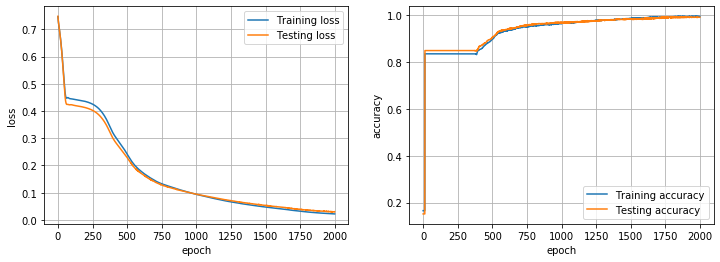

In [130]:
fig = plt.figure(figsize=(12,4))
ax = plt.subplot(1,2,1)
plt.plot(Train_loss, label='Training loss')
plt.plot(Test_loss, label='Testing loss')
plt.legend()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
ax = plt.subplot(1,2,2)
plt.plot(Train_acc, label='Training accuracy')
plt.plot(Test_acc, label='Testing accuracy')
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.show()
fig.savefig("nn.png")

In [131]:
MODEL_PATH = 'model/model.pth'
torch.save(net, MODEL_PATH)

In [132]:
net = torch.load(MODEL_PATH)

In [133]:
classes = ['Hazardous', 'Non-hazardous']
y_pred = net(X_test_t)
y_pred = y_pred.ge(.5).view(-1)
y_test = y_test
print(classification_report(y_test_t.cpu().data.numpy(), y_pred.cpu().data.numpy(), target_names=classes))

               precision    recall  f1-score   support

    Hazardous       0.99      0.99      0.99      1194
Non-hazardous       0.97      0.97      0.97       213

     accuracy                           0.99      1407
    macro avg       0.98      0.98      0.98      1407
 weighted avg       0.99      0.99      0.99      1407



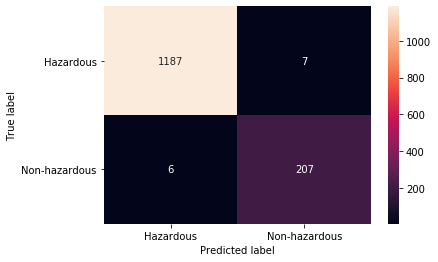

In [134]:
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test_t.cpu().data.numpy(), y_pred.cpu().data.numpy())
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=0, ha='center')
bottom, top = hmap.get_ylim()
hmap.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [135]:
np.round((1-np.sum(y_pred.cpu().data.numpy() != y_test_t.cpu().data.numpy())/y_test_t.cpu().data.numpy().shape[0])*100, 2)

99.08